# Visualizations of estimates by PCA

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

First, isolate data from trilingual speakers.

In [2]:
df = pd.read_csv("data/estimates_and_blp.csv")
df_tri = df[df['lang_profile']!="mono"].copy()
df.head()

,partID,cat_warning,cat_vowel_estimate,cat_vowel_std,cat_duration_estimate,cat_duration_std,cat_spectilt_estimate,cat_spectilt_std,spa_warning,spa_vowel_estimate,...,eng_warning,eng_vowel_estimate,eng_vowel_std,eng_duration_estimate,eng_duration_std,eng_spectilt_estimate,eng_spectilt_std,lang_profile,pc1,pc2
0,acj047,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0.252188,0.183914,0.971723,0.222588,0.390739,0.184323,mono,NaN,NaN
1,acj297,0,0.210356,0.146814,-0.085561,0.147077,-0.278363,0.150769,0,1.162825,...,0,1.307934,0.290871,2.409308,0.453406,0.588664,0.232368,l1_eng,3.764211,-1.240101
2,acr108,0,0.273684,0.162629,0.265210,0.169568,0.172382,0.160731,0,0.553943,...,0,-0.336151,0.181966,2.183468,0.426018,-0.140840,0.180522,l1_eng,3.094974,-0.507547
3,aei079,0,0.326162,0.151268,-0.253304,0.150526,0.110451,0.148743,0,0.187595,...,0,1.873218,0.376852,0.934558,0.214967,0.043377,0.187671,l1_eng,4.173198,2.576465
4,ael236,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0.673082,0.205907,2.795683,0.598022,-0.222353,0.193451,mono,NaN,NaN


In [3]:
print("english errors: ", df.eng_warning.unique())
print(len(df))
df_eng_nowarnings = df[(df['eng_warning'].str.len()<=4) | (df_tri['eng_warning'].isna())].copy()
print(len(df_eng_nowarnings))
print("catalan errors: ", df_tri.cat_warning.unique())
print(len(df_tri))
df_cat_nowarnings = df_tri[(df_tri['cat_warning'].str.len()<=4) | (df_tri['cat_warning'].isna())].copy()
print(len(df_cat_nowarnings))
print("spanish errors: ", df_tri.spa_warning.unique())
df_spa_nowarnings = df_tri[(df_tri['spa_warning'].str.len()<=4) | (df_tri['spa_warning'].isna())].copy()
len(df_spa_nowarnings)

english errors:  ['0'
 'list(message = "glm.fit: fitted probabilities numerically 0 or 1 occurred", call = NULL)'
 'list(message = "glm.fit: algorithm did not converge", call = NULL)']
63
59
catalan errors:  ['0' nan
 'list(message = "glm.fit: algorithm did not converge", call = NULL)'
 'list(message = "glm.fit: fitted probabilities numerically 0 or 1 occurred", call = NULL)']
48
44
spanish errors:  ['0'
 'list(message = "glm.fit: fitted probabilities numerically 0 or 1 occurred", call = NULL)']


47

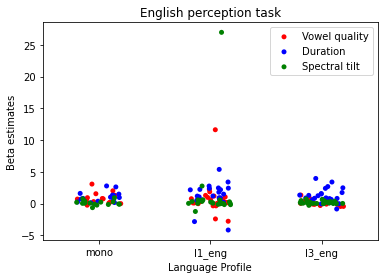

In [4]:
ax = sns.stripplot(x = df.lang_profile, y = df.eng_vowel_estimate, color = "r",
                   label = "Vowel quality", jitter = 0.2)
ax = sns.stripplot(x = df.lang_profile, y = df.eng_duration_estimate, color = "b",
                   label = "Duration", jitter = 0.2)
ax = sns.stripplot(x = df.lang_profile, y = df.eng_spectilt_estimate, color = "g",
                   label = "Spectral tilt", jitter = 0.2)
handles, labels = ax.get_legend_handles_labels()
handles = [handles[0],handles[3], handles[6]]
labels = ['Vowel quality', 'Duration', 'Spectral tilt']

ax.legend(handles, labels)
ax.set(xlabel = "Language Profile",
      ylabel = "Beta estimates",
      title = "English perception task")

#plt.ylim([-2.5,3.5])

plt.show();

English perception with whiskers.

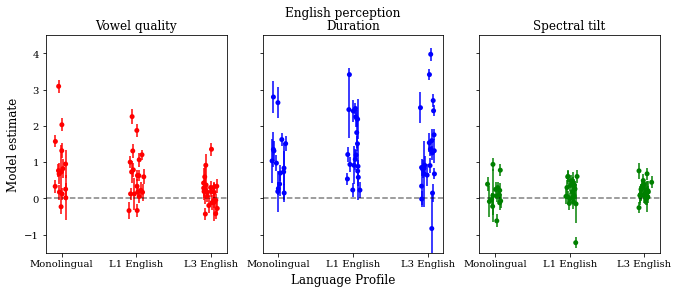

In [5]:
tex_fonts = {
    "font.family": "serif",
    # Use 10pt font in plots, to match 10pt font in document
    "axes.labelsize": 12,
    "font.size": 10,
    # Make the legend/label fonts a little smaller
    "legend.fontsize": 10,
    "xtick.labelsize": 10,
    "ytick.labelsize": 10
}
plt.rcParams.update(tex_fonts)

fig, axes = plt.subplots(1,3, sharey = True, sharex = True, figsize = (11,4))
sns.stripplot(ax = axes[0], x = df_eng_nowarnings.lang_profile,
                y = df_eng_nowarnings.eng_vowel_estimate, color = "r")

x_coords_0 = []
y_coords_0 = []
for point_pair in axes[0].collections:
    for x, y in point_pair.get_offsets():
        x_coords_0.append(x)
        y_coords_0.append(y)
        
axes[0].errorbar(x_coords_0, y_coords_0, yerr=df_eng_nowarnings.eng_vowel_std,
                 color = 'r', fmt=' ', zorder=-1)


axes[0].axhline(y = 0, color = "black", linestyle = "--", alpha = 0.5)
axes[0].set_title("Vowel quality")
axes[1].axhline(y = 0, color = "black", linestyle = "--", alpha = 0.5)
axes[1].set_title("Duration")
axes[2].axhline(y = 0, color = "black", linestyle = "--", alpha = 0.5)
sns.stripplot(ax = axes[1], x = df_eng_nowarnings.lang_profile,
                y = df_eng_nowarnings.eng_duration_estimate, color = "b")

x_coords_1 = []
y_coords_1 = []
for point_pair in axes[1].collections:
    for x, y in point_pair.get_offsets():
        x_coords_1.append(x)
        y_coords_1.append(y)
        
axes[1].errorbar(x_coords_1, y_coords_1, yerr=df_eng_nowarnings.eng_duration_std,
                 color = 'b', fmt=' ', zorder=-1)

sns.stripplot(ax = axes[2], x = df_eng_nowarnings.lang_profile,
                y = df_eng_nowarnings.eng_spectilt_estimate, color = "g")

x_coords_2 = []
y_coords_2 = []
for point_pair in axes[2].collections:
    for x, y in point_pair.get_offsets():
        x_coords_2.append(x)
        y_coords_2.append(y)
        
axes[2].errorbar(x_coords_2, y_coords_2, yerr=df_eng_nowarnings.eng_spectilt_std,
                 color = 'g', fmt=' ', zorder=-1)
axes[2].set_title("Spectral tilt")

axes[0].set_xticklabels(['Monolingual', 'L1 English', 'L3 English'])
axes[0].set_xlabel("")
axes[1].set_xlabel("")
axes[2].set_xlabel("")
axes[0].set_ylabel("Model estimate")
axes[1].set_ylabel("")
axes[2].set_ylabel("")
fig.supxlabel("Language Profile")
fig.suptitle("English perception")

plt.ylim([-1.5,4.5])
plt.savefig('figures/eng_estimates.jpg', format='jpg', dpi = 800)
plt.show();

English perception by first component only by trilinguals, with whiskers

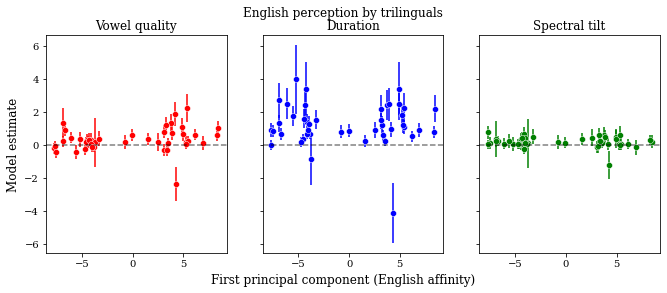

In [8]:
df_eng_tri = df_eng_nowarnings[df_eng_nowarnings['lang_profile']!="mono"].copy()

tex_fonts = {
    "font.family": "serif",
    # Use 10pt font in plots, to match 10pt font in document
    "axes.labelsize": 12,
    "font.size": 10,
    # Make the legend/label fonts a little smaller
    "legend.fontsize": 10,
    "xtick.labelsize": 10,
    "ytick.labelsize": 10
}
plt.rcParams.update(tex_fonts)

fig, axes = plt.subplots(1,3, sharey = True, sharex = True, figsize = (11,4))
sns.scatterplot(ax = axes[0], x = df_eng_tri.pc1,
                y = df_eng_tri.eng_vowel_estimate, color = "r")
axes[0].errorbar(df_eng_tri.pc1,
                 df_eng_tri.eng_vowel_estimate,
                 yerr=2*df_eng_tri.eng_vowel_std, fmt=' ',
            zorder=-1, color = "r")
axes[0].axhline(y = 0, color = "black", linestyle = "--", alpha = 0.5)
axes[0].set_title("Vowel quality")
axes[1].axhline(y = 0, color = "black", linestyle = "--", alpha = 0.5)
axes[1].set_title("Duration")
axes[2].axhline(y = 0, color = "black", linestyle = "--", alpha = 0.5)
sns.scatterplot(ax = axes[1], x = df_eng_tri.pc1,
                y = df_eng_tri.eng_duration_estimate, color = "b")
axes[1].errorbar(df_eng_tri.pc1,
                 df_eng_tri.eng_duration_estimate,
                 yerr=2*df_eng_tri.eng_duration_std, fmt=' ',
            zorder=-1, color = "b")
sns.scatterplot(ax = axes[2], x = df_eng_tri.pc1,
                y = df_eng_tri.eng_spectilt_estimate, color = "g")
axes[2].errorbar(df_eng_tri.pc1,
                 df_eng_tri.eng_spectilt_estimate,
                 yerr=2*df_eng_tri.eng_spectilt_std, fmt=' ',
            zorder=-1, color = "g")
axes[2].set_title("Spectral tilt")
axes[0].set_xlabel("")
axes[1].set_xlabel("")
axes[2].set_xlabel("")
axes[0].set_ylabel("Model estimate")
fig.supxlabel("First principal component (English affinity)")
fig.suptitle("English perception by trilinguals")
# fig.supylabel("Vowel quality estimate")
# handles, labels = ax.get_legend_handles_labels()
# #handles = [handles[0],handles[2], handles[4]]
# labels = ['Vowel quality', 'Duration', 'Spectral tilt']

# ax.legend(handles, labels)
# ax.set(xlabel = "First Principal Component (English affinity)",
#       ylabel = "Beta estimates",
#       title = "Catalan perception task")

#plt.ylim([-4,6])
plt.savefig('figures/eng_estimates_pc1.jpg', format='jpg', dpi = 800)
plt.show();

English perception of trilinguals by second component with whiskers

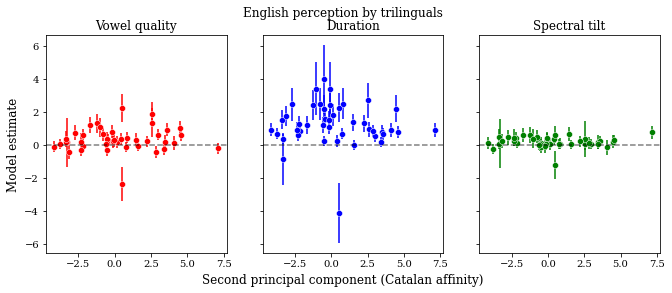

In [9]:
tex_fonts = {
    "font.family": "serif",
    # Use 10pt font in plots, to match 10pt font in document
    "axes.labelsize": 12,
    "font.size": 10,
    # Make the legend/label fonts a little smaller
    "legend.fontsize": 10,
    "xtick.labelsize": 10,
    "ytick.labelsize": 10
}
plt.rcParams.update(tex_fonts)

fig, axes = plt.subplots(1,3, sharey = True, sharex = True, figsize = (11,4))
sns.scatterplot(ax = axes[0], x = df_eng_tri.pc2,
                y = df_eng_tri.eng_vowel_estimate, color = "r")
axes[0].errorbar(df_eng_tri.pc2,
                 df_eng_tri.eng_vowel_estimate,
                 yerr=2*df_eng_tri.eng_vowel_std, fmt=' ',
            zorder=-1, color = "r")
axes[0].axhline(y = 0, color = "black", linestyle = "--", alpha = 0.5)
axes[0].set_title("Vowel quality")
axes[1].axhline(y = 0, color = "black", linestyle = "--", alpha = 0.5)
axes[1].set_title("Duration")
axes[2].axhline(y = 0, color = "black", linestyle = "--", alpha = 0.5)
sns.scatterplot(ax = axes[1], x = df_eng_tri.pc2,
                y = df_eng_tri.eng_duration_estimate, color = "b")
axes[1].errorbar(df_eng_tri.pc2,
                 df_eng_tri.eng_duration_estimate,
                 yerr=2*df_eng_tri.eng_duration_std, fmt=' ',
            zorder=-1, color = "b")
sns.scatterplot(ax = axes[2], x = df_eng_tri.pc2,
                y = df_eng_tri.eng_spectilt_estimate, color = "g")
axes[2].errorbar(df_eng_tri.pc2,
                 df_eng_tri.eng_spectilt_estimate,
                 yerr=2*df_eng_tri.eng_spectilt_std, fmt=' ',
            zorder=-1, color = "g")
axes[2].set_title("Spectral tilt")
axes[0].set_xlabel("")
axes[1].set_xlabel("")
axes[2].set_xlabel("")
axes[0].set_ylabel("Model estimate")
fig.supxlabel("Second principal component (Catalan affinity)")
fig.suptitle("English perception by trilinguals")
# fig.supylabel("Vowel quality estimate")
# handles, labels = ax.get_legend_handles_labels()
# #handles = [handles[0],handles[2], handles[4]]
# labels = ['Vowel quality', 'Duration', 'Spectral tilt']

# ax.legend(handles, labels)
# ax.set(xlabel = "First Principal Component (English affinity)",
#       ylabel = "Beta estimates",
#       title = "Catalan perception task")

#plt.ylim([-4,6])
plt.savefig('figures/eng_estimates_pc2.jpg', format='jpg', dpi = 800)
plt.show();

Catalan perception by predetermined language profile:

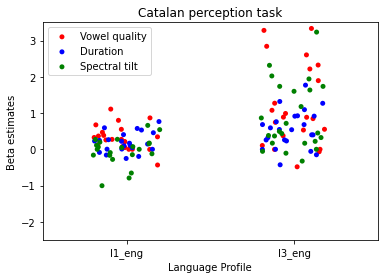

In [75]:
ax = sns.stripplot(x = df_cat_nowarnings.lang_profile, y = df_cat_nowarnings.cat_vowel_estimate,
                   color = "r", label = "Vowel quality", jitter = 0.2)
ax = sns.stripplot(x = df_cat_nowarnings.lang_profile,
                   y = df_cat_nowarnings.cat_duration_estimate, color = "b",
                   label = "Duration", jitter = 0.2)
ax = sns.stripplot(x = df_cat_nowarnings.lang_profile,
                   y = df_cat_nowarnings.cat_spectilt_estimate, color = "g",
                   label = "Spectral tilt", jitter = 0.2)
handles, labels = ax.get_legend_handles_labels()
handles = [handles[0],handles[2], handles[4]]
labels = ['Vowel quality', 'Duration', 'Spectral tilt']

ax.legend(handles, labels)
ax.set(xlabel = "Language Profile",
      ylabel = "Beta estimates",
      title = "Catalan perception task")

plt.ylim([-2.5,3.5])

plt.show();

Catalan perception by first component (English affinity):

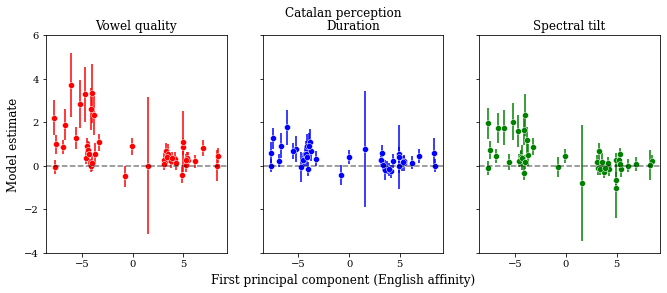

In [123]:
tex_fonts = {
    "font.family": "serif",
    # Use 10pt font in plots, to match 10pt font in document
    "axes.labelsize": 12,
    "font.size": 10,
    # Make the legend/label fonts a little smaller
    "legend.fontsize": 10,
    "xtick.labelsize": 10,
    "ytick.labelsize": 10
}
plt.rcParams.update(tex_fonts)

fig, axes = plt.subplots(1,3, sharey = True, sharex = True, figsize = (11,4))
sns.scatterplot(ax = axes[0], x = df_cat_nowarnings.pc1,
                y = df_cat_nowarnings.cat_vowel_estimate, color = "r")
axes[0].errorbar(df_cat_nowarnings.pc1,
                 df_cat_nowarnings.cat_vowel_estimate,
                 yerr=2*df_cat_nowarnings.cat_vowel_std, fmt=' ',
            zorder=-1, color = "r")
axes[0].axhline(y = 0, color = "black", linestyle = "--", alpha = 0.5)
axes[0].set_title("Vowel quality")
axes[1].axhline(y = 0, color = "black", linestyle = "--", alpha = 0.5)
axes[1].set_title("Duration")
axes[2].axhline(y = 0, color = "black", linestyle = "--", alpha = 0.5)
sns.scatterplot(ax = axes[1], x = df_cat_nowarnings.pc1,
                y = df_cat_nowarnings.cat_duration_estimate, color = "b")
axes[1].errorbar(df_cat_nowarnings.pc1,
                 df_cat_nowarnings.cat_duration_estimate,
                 yerr=2*df_cat_nowarnings.cat_duration_std, fmt=' ',
            zorder=-1, color = "b")
sns.scatterplot(ax = axes[2], x = df_cat_nowarnings.pc1,
                y = df_cat_nowarnings.cat_spectilt_estimate, color = "g")
axes[2].errorbar(df_cat_nowarnings.pc1,
                 df_cat_nowarnings.cat_spectilt_estimate,
                 yerr=2*df_cat_nowarnings.cat_spectilt_std, fmt=' ',
            zorder=-1, color = "g")
axes[2].set_title("Spectral tilt")
axes[0].set_xlabel("")
axes[1].set_xlabel("")
axes[2].set_xlabel("")
axes[0].set_ylabel("Model estimate")
fig.supxlabel("First principal component (English affinity)")
fig.suptitle("Catalan perception")
# fig.supylabel("Vowel quality estimate")
# handles, labels = ax.get_legend_handles_labels()
# #handles = [handles[0],handles[2], handles[4]]
# labels = ['Vowel quality', 'Duration', 'Spectral tilt']

# ax.legend(handles, labels)
# ax.set(xlabel = "First Principal Component (English affinity)",
#       ylabel = "Beta estimates",
#       title = "Catalan perception task")

plt.ylim([-4,6])
plt.savefig('figures/cat_estimates_pc1.jpg', format='jpg', dpi = 800)
plt.show();

Catalan perception across second principal component

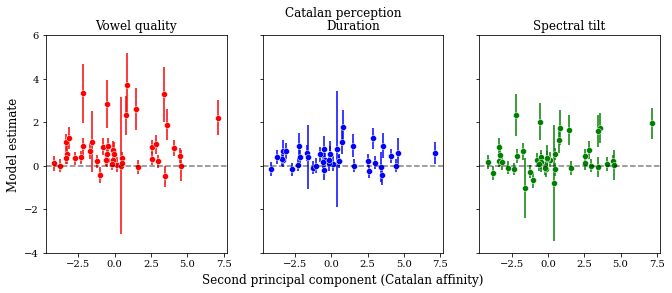

In [124]:
tex_fonts = {
    "font.family": "serif",
    # Use 10pt font in plots, to match 10pt font in document
    "axes.labelsize": 12,
    "font.size": 10,
    # Make the legend/label fonts a little smaller
    "legend.fontsize": 10,
    "xtick.labelsize": 10,
    "ytick.labelsize": 10
}
plt.rcParams.update(tex_fonts)

fig, axes = plt.subplots(1,3, sharey = True, sharex = True, figsize = (11,4))
sns.scatterplot(ax = axes[0], x = df_cat_nowarnings.pc2,
                y = df_cat_nowarnings.cat_vowel_estimate, color = "r")
axes[0].errorbar(df_cat_nowarnings.pc2,
                 df_cat_nowarnings.cat_vowel_estimate,
                 yerr=2*df_cat_nowarnings.cat_vowel_std, fmt=' ',
            zorder=-1, color = "r")
axes[0].axhline(y = 0, color = "black", linestyle = "--", alpha = 0.5)
axes[0].set_title("Vowel quality")
axes[1].axhline(y = 0, color = "black", linestyle = "--", alpha = 0.5)
axes[1].set_title("Duration")
axes[2].axhline(y = 0, color = "black", linestyle = "--", alpha = 0.5)
sns.scatterplot(ax = axes[1], x = df_cat_nowarnings.pc2,
                y = df_cat_nowarnings.cat_duration_estimate, color = "b")
axes[1].errorbar(df_cat_nowarnings.pc2,
                 df_cat_nowarnings.cat_duration_estimate,
                 yerr=2*df_cat_nowarnings.cat_duration_std, fmt=' ',
            zorder=-1, color = "b")
sns.scatterplot(ax = axes[2], x = df_cat_nowarnings.pc2,
                y = df_cat_nowarnings.cat_spectilt_estimate, color = "g")
axes[2].errorbar(df_cat_nowarnings.pc2,
                 df_cat_nowarnings.cat_spectilt_estimate,
                 yerr=2*df_cat_nowarnings.cat_spectilt_std, fmt=' ',
            zorder=-1, color = "g")
axes[2].set_title("Spectral tilt")
axes[0].set_xlabel("")
axes[1].set_xlabel("")
axes[2].set_xlabel("")
axes[0].set_ylabel("Model estimate")
fig.supxlabel("Second principal component (Catalan affinity)")
fig.suptitle("Catalan perception")
# fig.supylabel("Vowel quality estimate")
# handles, labels = ax.get_legend_handles_labels()
# #handles = [handles[0],handles[2], handles[4]]
# labels = ['Vowel quality', 'Duration', 'Spectral tilt']

# ax.legend(handles, labels)
# ax.set(xlabel = "First Principal Component (English affinity)",
#       ylabel = "Beta estimates",
#       title = "Catalan perception task")

plt.ylim([-4,6])
plt.savefig('figures/cat_estimates_pc2.jpg', format='jpg', dpi = 800)
plt.show();

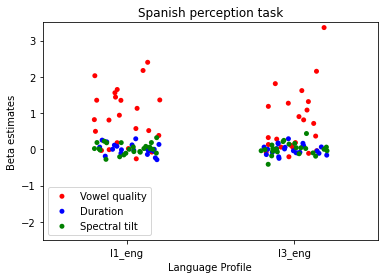

In [67]:
ax = sns.stripplot(x = df_tri.lang_profile, y = df_tri.spa_vowel_estimate, color = "r",
                   label = "Vowel quality", jitter = 0.2)
ax = sns.stripplot(x = df_tri.lang_profile, y = df_tri.spa_duration_estimate, color = "b",
                   label = "Duration", jitter = 0.2)
ax = sns.stripplot(x = df_tri.lang_profile, y = df_tri.spa_spectilt_estimate, color = "g",
                   label = "Spectral tilt", jitter = 0.2)
handles, labels = ax.get_legend_handles_labels()
handles = [handles[0],handles[2], handles[4]]
labels = ['Vowel quality', 'Duration', 'Spectral tilt']

ax.legend(handles, labels)
ax.set(xlabel = "Language Profile",
      ylabel = "Beta estimates",
      title = "Spanish perception task")

plt.ylim([-2.5,3.5])

plt.show();

Spanish perception by the first principal component:

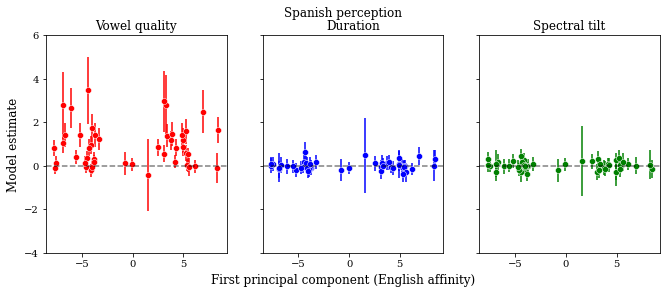

In [126]:
tex_fonts = {
    "font.family": "serif",
    # Use 10pt font in plots, to match 10pt font in document
    "axes.labelsize": 12,
    "font.size": 10,
    # Make the legend/label fonts a little smaller
    "legend.fontsize": 10,
    "xtick.labelsize": 10,
    "ytick.labelsize": 10
}
plt.rcParams.update(tex_fonts)

fig, axes = plt.subplots(1,3, sharey = True, sharex = True, figsize = (11,4))
sns.scatterplot(ax = axes[0], x = df_spa_nowarnings.pc1,
                y = df_spa_nowarnings.spa_vowel_estimate, color = "r")
axes[0].errorbar(df_spa_nowarnings.pc1,
                 df_spa_nowarnings.spa_vowel_estimate,
                 yerr=2*df_spa_nowarnings.spa_vowel_std, fmt=' ',
            zorder=-1, color = "r")
axes[0].axhline(y = 0, color = "black", linestyle = "--", alpha = 0.5)
axes[0].set_title("Vowel quality")
axes[1].axhline(y = 0, color = "black", linestyle = "--", alpha = 0.5)
axes[1].set_title("Duration")
axes[2].axhline(y = 0, color = "black", linestyle = "--", alpha = 0.5)
sns.scatterplot(ax = axes[1], x = df_spa_nowarnings.pc1,
                y = df_spa_nowarnings.spa_duration_estimate, color = "b")
axes[1].errorbar(df_spa_nowarnings.pc1,
                 df_spa_nowarnings.spa_duration_estimate,
                 yerr=2*df_spa_nowarnings.spa_duration_std, fmt=' ',
            zorder=-1, color = "b")
sns.scatterplot(ax = axes[2], x = df_spa_nowarnings.pc1,
                y = df_spa_nowarnings.spa_spectilt_estimate, color = "g")
axes[2].errorbar(df_spa_nowarnings.pc1,
                 df_spa_nowarnings.spa_spectilt_estimate,
                 yerr=2*df_spa_nowarnings.spa_spectilt_std, fmt=' ',
            zorder=-1, color = "g")
axes[2].set_title("Spectral tilt")
axes[0].set_xlabel("")
axes[1].set_xlabel("")
axes[2].set_xlabel("")
axes[0].set_ylabel("Model estimate")
fig.supxlabel("First principal component (English affinity)")
fig.suptitle("Spanish perception")

plt.ylim([-4,6])
plt.savefig('figures/spa_estimates_pc1.jpg', format='jpg', dpi = 800)
plt.show();

Spanish perception by second principal component

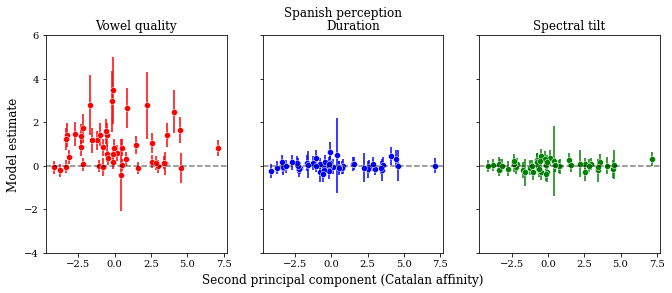

In [127]:
tex_fonts = {
    "font.family": "serif",
    # Use 10pt font in plots, to match 10pt font in document
    "axes.labelsize": 12,
    "font.size": 10,
    # Make the legend/label fonts a little smaller
    "legend.fontsize": 10,
    "xtick.labelsize": 10,
    "ytick.labelsize": 10
}
plt.rcParams.update(tex_fonts)

fig, axes = plt.subplots(1,3, sharey = True, sharex = True, figsize = (11,4))
sns.scatterplot(ax = axes[0], x = df_spa_nowarnings.pc2,
                y = df_spa_nowarnings.spa_vowel_estimate, color = "r")
axes[0].errorbar(df_spa_nowarnings.pc2,
                 df_spa_nowarnings.spa_vowel_estimate,
                 yerr=2*df_spa_nowarnings.spa_vowel_std, fmt=' ',
            zorder=-1, color = "r")
axes[0].axhline(y = 0, color = "black", linestyle = "--", alpha = 0.5)
axes[0].set_title("Vowel quality")
axes[1].axhline(y = 0, color = "black", linestyle = "--", alpha = 0.5)
axes[1].set_title("Duration")
axes[2].axhline(y = 0, color = "black", linestyle = "--", alpha = 0.5)
sns.scatterplot(ax = axes[1], x = df_spa_nowarnings.pc2,
                y = df_spa_nowarnings.spa_duration_estimate, color = "b")
axes[1].errorbar(df_spa_nowarnings.pc2,
                 df_spa_nowarnings.spa_duration_estimate,
                 yerr=2*df_spa_nowarnings.spa_duration_std, fmt=' ',
            zorder=-1, color = "b")
sns.scatterplot(ax = axes[2], x = df_spa_nowarnings.pc2,
                y = df_spa_nowarnings.spa_spectilt_estimate, color = "g")
axes[2].errorbar(df_spa_nowarnings.pc2,
                 df_spa_nowarnings.spa_spectilt_estimate,
                 yerr=2*df_spa_nowarnings.spa_spectilt_std, fmt=' ',
            zorder=-1, color = "g")
axes[2].set_title("Spectral tilt")
axes[0].set_xlabel("")
axes[1].set_xlabel("")
axes[2].set_xlabel("")
axes[0].set_ylabel("Model estimate")
fig.supxlabel("Second principal component (Catalan affinity)")
fig.suptitle("Spanish perception")

plt.ylim([-4,6])
plt.savefig('figures/spa_estimates_pc2.jpg', format='jpg', dpi = 800)
plt.show();

In [235]:
df_tri.columns

Index(['partID', 'cat_vowel_estimate', 'cat_duration_estimate',
       'cat_spectilt_estimate', 'spa_vowel_estimate', 'spa_duration_estimate',
       'spa_spectilt_estimate', 'eng_vowel_estimate', 'eng_duration_estimate',
       'eng_spectilt_estimate', 'Age', 'Education', 'Education_6_TEXT',
       'Finished', 'Gender', 'Q1.1_1', 'Q1.1_2', 'Q1.1_3', 'Q10.1_1',
       'Q10.1_2', 'Q10.1_3', 'Q10.1_4', 'Q11.1_1', 'Q11.1_2', 'Q11.1_3',
       'Q11.1_4', 'Q12_1', 'Q12_2', 'Q12_3', 'Q13_1', 'Q13_2', 'Q13_3',
       'Q14_1', 'Q14_2', 'Q14_3', 'Q15_1', 'Q15_2', 'Q15_3', 'Q16_1', 'Q16_2',
       'Q16_3', 'Q16_5_1', 'Q16_5_2', 'Q16_5_3', 'Q17_1', 'Q17_2', 'Q17_3',
       'Q18_1', 'Q18_2', 'Q18_3', 'Q2.1_1', 'Q2.1_2', 'Q2.1_3', 'Q3.1_1',
       'Q3.1_2', 'Q3.1_3', 'Q4.1_1', 'Q4.1_2', 'Q4.1_3', 'Q5.1_1', 'Q5.1_2',
       'Q5.1_3', 'Q6.1_1', 'Q6.1_2', 'Q6.1_3', 'Q7.1_1', 'Q7.1_2', 'Q7.1_3',
       'Q7.1_4', 'Q8.1_1', 'Q8.1_2', 'Q8.1_3', 'Q8.1_4', 'Q9.1_1', 'Q9.1_2',
       'Q9.1_3', 'Q9.1_4', 'Res

In [5]:
df_tri = df_tri.drop(['Education_6_TEXT', 'Finished', 'Residence', 'prof', 'partID'], axis = 1)

Replace some text with numeric values

In [237]:
# Age of acquisition
# Since birth to 0
df_tri.loc[df_tri['Q1.1_3']=='Since birth', 'Q1.1_3'] = 0
df_tri.loc[df_tri['Q1.1_2']=='Since birth', 'Q1.1_2'] = 0
df_tri.loc[df_tri['Q1.1_1']=='Since birth', 'Q1.1_1'] = 0
# 20+ to 20??
df_tri.loc[df_tri['Q1.1_2']=='20+', 'Q1.1_2'] = 20
df_tri.loc[df_tri['Q1.1_1']=='20+', 'Q1.1_1'] = 20

In [238]:
# Age of comfort
# As early as I can remember to 0
df_tri.loc[df_tri['Q2.1_1']=='As early as I can remember', 'Q2.1_1'] = 0
df_tri.loc[df_tri['Q2.1_2']=='As early as I can remember', 'Q2.1_2'] = 0
df_tri.loc[df_tri['Q2.1_3']=='As early as I can remember', 'Q2.1_3'] = 0
# 20+ to 20??
df_tri.loc[df_tri['Q2.1_3']=='20+', 'Q2.1_3'] = 20
df_tri.loc[df_tri['Q2.1_2']=='20+', 'Q2.1_2'] = 20
df_tri.loc[df_tri['Q2.1_1']=='20+', 'Q2.1_1'] = 20
# Still not comfortable to 30??
df_tri.loc[df_tri['Q2.1_3']=='Still not comfortable', 'Q2.1_3'] = 30
df_tri.loc[df_tri['Q2.1_2']=='Still not comfortable', 'Q2.1_2'] = 30
df_tri.loc[df_tri['Q2.1_1']=='Still not comfortable', 'Q2.1_1'] = 30

In [239]:
# Years of classes
# 20+ to 20??
df_tri.loc[df_tri['Q3.1_3']=='20+', 'Q3.1_3'] = 20
df_tri.loc[df_tri['Q3.1_2']=='20+', 'Q3.1_2'] = 20
df_tri.loc[df_tri['Q3.1_1']=='20+', 'Q3.1_1'] = 20

In [240]:
# Years spent in a region, family, and work that speaks the language
# 20+ to 20??
df_tri.loc[df_tri['Q4.1_3']=='20+', 'Q4.1_3'] = 20
df_tri.loc[df_tri['Q4.1_2']=='20+', 'Q4.1_2'] = 20
df_tri.loc[df_tri['Q4.1_1']=='20+', 'Q4.1_1'] = 20

df_tri.loc[df_tri['Q5.1_3']=='20+', 'Q5.1_3'] = 20
df_tri.loc[df_tri['Q5.1_2']=='20+', 'Q5.1_2'] = 20
df_tri.loc[df_tri['Q5.1_1']=='20+', 'Q5.1_1'] = 20

df_tri.loc[df_tri['Q6.1_3']=='20+', 'Q6.1_3'] = 20
df_tri.loc[df_tri['Q6.1_2']=='20+', 'Q6.1_2'] = 20
df_tri.loc[df_tri['Q6.1_1']=='20+', 'Q6.1_1'] = 20

In [241]:
# convert to numeric
df_tri[['Q1.1_1', 'Q1.1_2', 'Q1.1_3', 'Q2.1_1', 'Q2.1_2',
        'Q2.1_3', 'Q3.1_1', 'Q3.1_2', 'Q3.1_3', 'Q4.1_1',
       'Q4.1_2', 'Q4.1_3', 'Q5.1_1', 'Q5.1_2', 'Q5.1_3',
       'Q6.1_1', 'Q6.1_2', 'Q6.1_3', 'Q7.1_1', 'Q7.1_2',
       'Q7.1_3', 'Q7.1_4', 'Q8.1_1', 'Q8.1_2', 'Q8.1_3', 'Q8.1_4', 'Q9.1_1',
       'Q9.1_2', 'Q9.1_3', 'Q9.1_4', 'Q10.1_1', 'Q10.1_2', 'Q10.1_3', 'Q10.1_4',
       'Q11.1_1', 'Q11.1_2', 'Q11.1_3', 'Q11.1_4', 'Q12_1', 'Q12_2',
       'Q12_3', 'Q13_1', 'Q13_2', 'Q13_3', 'Q14_1',
       'Q14_2', 'Q14_3', 'Q15_1', 'Q15_2', 'Q15_3',
       'Q16_1', 'Q16_2', 'Q16_3', 'Q17_1', 'Q17_2',
       'Q17_3', 'Q18_1', 'Q18_2', 'Q18_3']] = df_tri[['Q1.1_1', 'Q1.1_2', 'Q1.1_3', 'Q2.1_1', 'Q2.1_2',
        'Q2.1_3', 'Q3.1_1', 'Q3.1_2', 'Q3.1_3', 'Q4.1_1',
       'Q4.1_2', 'Q4.1_3', 'Q5.1_1', 'Q5.1_2', 'Q5.1_3',
       'Q6.1_1', 'Q6.1_2', 'Q6.1_3', 'Q7.1_1', 'Q7.1_2',
       'Q7.1_3', 'Q7.1_4', 'Q8.1_1', 'Q8.1_2', 'Q8.1_3', 'Q8.1_4', 'Q9.1_1',
       'Q9.1_2', 'Q9.1_3', 'Q9.1_4', 'Q10.1_1', 'Q10.1_2', 'Q10.1_3', 'Q10.1_4',
       'Q11.1_1', 'Q11.1_2', 'Q11.1_3', 'Q11.1_4', 'Q12_1', 'Q12_2',
       'Q12_3', 'Q13_1', 'Q13_2', 'Q13_3', 'Q14_1',
       'Q14_2', 'Q14_3', 'Q15_1', 'Q15_2', 'Q15_3',
       'Q16_1', 'Q16_2', 'Q16_3', 'Q17_1', 'Q17_2',
       'Q17_3', 'Q18_1', 'Q18_2', 'Q18_3']].apply(pd.to_numeric)

Scale all the numeric columns

In [242]:
from sklearn.preprocessing import StandardScaler
num_cols = df_tri.columns[df_tri.dtypes.apply(lambda c: np.issubdtype(c, np.number))]
scaler = StandardScaler()
df_tri[num_cols] = scaler.fit_transform(df_tri[num_cols])
df_tri.head()

   cat_vowel_estimate  cat_duration_estimate  cat_spectilt_estimate  \
1            0.203652              -0.081255              -0.270653   
2            0.220428               0.188658               0.141102   
3            0.311653              -0.242160               0.099397   
5            2.061576               0.626571               0.623654   
6            0.204621               0.140916              -0.003427   

   spa_vowel_estimate  spa_duration_estimate  spa_spectilt_estimate  \
1            1.129862               0.083501              -0.063743   
2            0.381606              -0.014033              -0.154940   
3            0.181678              -0.040163               0.060670   
5            2.152898               0.009833              -0.070415   
6           -0.031670              -0.141975               0.080674   

   eng_vowel_estimate  eng_duration_estimate  eng_spectilt_estimate  Age  ...  \
1            0.675437               1.685695               0.2477

,cat_vowel_estimate,cat_duration_estimate,cat_spectilt_estimate,spa_vowel_estimate,spa_duration_estimate,spa_spectilt_estimate,eng_vowel_estimate,eng_duration_estimate,eng_spectilt_estimate,Age,...,Q7.1_4,Q8.1_1,Q8.1_2,Q8.1_3,Q8.1_4,Q9.1_1,Q9.1_2,Q9.1_3,Q9.1_4,lang_profile
1,-0.557051,-0.970298,-1.100033,0.392287,0.022822,-0.521566,0.329939,0.176191,-0.176232,-0.118850,...,-0.330925,1.086230,-0.518211,-0.364299,-0.184988,2.190668,-0.770172,-0.972048,-0.360769,l1_eng
2,-0.532882,-0.096095,-0.175774,-0.524716,-0.003839,-1.114566,-0.013976,0.268833,-0.266556,-0.118850,...,-0.330925,-0.053421,-0.044418,0.072860,-0.184988,-0.495699,-0.770172,1.108258,-0.360769,l1_eng
3,-0.401457,-1.491445,-0.269389,-0.769731,-0.010981,0.287415,0.572377,-0.095486,-0.233229,0.612534,...,-0.330925,-0.053421,-0.755107,0.728599,-0.184988,0.655602,0.786386,-0.972048,-0.360769,l1_eng
5,2.119610,1.322238,0.907401,1.646037,0.002685,-0.564950,0.180907,0.352717,-0.232546,-0.703958,...,0.603451,-0.053421,1.140063,-1.020038,-0.184988,0.271835,1.175525,-1.566421,0.688741,l3_eng
6,-0.555655,-0.250723,-0.500196,-1.031194,-0.038812,0.417493,0.288196,-0.145365,-0.233380,0.027427,...,-0.330925,-0.623247,-0.755107,1.165758,-0.184988,-0.879465,-0.381032,1.108258,-0.360769,l1_eng


Use one-hot encoding for the categorical variables.

In [243]:
df_tri = pd.get_dummies(data=df_tri)
df_tri.head()

,cat_vowel_estimate,cat_duration_estimate,cat_spectilt_estimate,spa_vowel_estimate,spa_duration_estimate,spa_spectilt_estimate,eng_vowel_estimate,eng_duration_estimate,eng_spectilt_estimate,Age,...,Education_Doctorate,Education_High school,Education_Masters,Education_Other:,Education_Professional training,Gender_Female,Gender_Male,Gender_Other,lang_profile_l1_eng,lang_profile_l3_eng
1,-0.557051,-0.970298,-1.100033,0.392287,0.022822,-0.521566,0.329939,0.176191,-0.176232,-0.118850,...,0,0,0,0,0,0,0,1,1,0
2,-0.532882,-0.096095,-0.175774,-0.524716,-0.003839,-1.114566,-0.013976,0.268833,-0.266556,-0.118850,...,0,0,0,0,0,1,0,0,1,0
3,-0.401457,-1.491445,-0.269389,-0.769731,-0.010981,0.287415,0.572377,-0.095486,-0.233229,0.612534,...,0,0,0,0,0,0,1,0,1,0
5,2.119610,1.322238,0.907401,1.646037,0.002685,-0.564950,0.180907,0.352717,-0.232546,-0.703958,...,0,0,0,0,0,0,1,0,0,1
6,-0.555655,-0.250723,-0.500196,-1.031194,-0.038812,0.417493,0.288196,-0.145365,-0.233380,0.027427,...,0,0,1,0,0,1,0,0,1,0


In [244]:
print(df_tri.columns.tolist())

['cat_vowel_estimate', 'cat_duration_estimate', 'cat_spectilt_estimate', 'spa_vowel_estimate', 'spa_duration_estimate', 'spa_spectilt_estimate', 'eng_vowel_estimate', 'eng_duration_estimate', 'eng_spectilt_estimate', 'Age', 'Q1.1_1', 'Q1.1_2', 'Q1.1_3', 'Q10.1_1', 'Q10.1_2', 'Q10.1_3', 'Q10.1_4', 'Q11.1_1', 'Q11.1_2', 'Q11.1_3', 'Q11.1_4', 'Q12_1', 'Q12_2', 'Q12_3', 'Q13_1', 'Q13_2', 'Q13_3', 'Q14_1', 'Q14_2', 'Q14_3', 'Q15_1', 'Q15_2', 'Q15_3', 'Q16_1', 'Q16_2', 'Q16_3', 'Q16_5_1', 'Q16_5_2', 'Q16_5_3', 'Q17_1', 'Q17_2', 'Q17_3', 'Q18_1', 'Q18_2', 'Q18_3', 'Q2.1_1', 'Q2.1_2', 'Q2.1_3', 'Q3.1_1', 'Q3.1_2', 'Q3.1_3', 'Q4.1_1', 'Q4.1_2', 'Q4.1_3', 'Q5.1_1', 'Q5.1_2', 'Q5.1_3', 'Q6.1_1', 'Q6.1_2', 'Q6.1_3', 'Q7.1_1', 'Q7.1_2', 'Q7.1_3', 'Q7.1_4', 'Q8.1_1', 'Q8.1_2', 'Q8.1_3', 'Q8.1_4', 'Q9.1_1', 'Q9.1_2', 'Q9.1_3', 'Q9.1_4', 'Education_College', 'Education_Doctorate', 'Education_High school', 'Education_Masters', 'Education_Other:', 'Education_Professional training', 'Gender_Female', 'Gen

In [245]:
df_tri = df_tri.dropna()
df_tri.isnull().values.any()

False

In [185]:
df_l1eng = df_tri[df_tri['lang_profile_l1_eng']==1].copy()
df_l3eng = df_tri[df_tri['lang_profile_l1_eng']==0].copy()

## Create sets of features and predicted values for each acoustic measure

In [246]:
X_eng_vowel = df_tri.drop(['eng_vowel_estimate'], axis = 1)
Y_eng_vowel = df_tri['eng_vowel_estimate']

X_spa_vowel = df_tri.drop(['spa_vowel_estimate'], axis = 1)
Y_spa_vowel = df_tri['spa_vowel_estimate']

X_cat_vowel = df_tri.drop(['cat_vowel_estimate'], axis = 1)
Y_cat_vowel = df_tri['cat_vowel_estimate']

X_eng_dur = df_tri.drop(['eng_duration_estimate'], axis = 1)
Y_eng_dur = df_tri['eng_duration_estimate']

X_spa_dur = df_tri.drop(['spa_duration_estimate'], axis = 1)
Y_spa_dur = df_tri['spa_duration_estimate']

X_cat_dur = df_tri.drop(['cat_duration_estimate'], axis = 1)
Y_cat_dur = df_tri['cat_duration_estimate']

X_eng_st = df_tri.drop(['eng_spectilt_estimate'], axis = 1)
Y_eng_st = df_tri['eng_spectilt_estimate']

X_spa_st = df_tri.drop(['spa_spectilt_estimate'], axis = 1)
Y_spa_st = df_tri['spa_spectilt_estimate']

X_cat_st = df_tri.drop(['cat_spectilt_estimate'], axis = 1)
Y_cat_st = df_tri['cat_spectilt_estimate']

Split into train, test, validate sets

In [112]:
from sklearn.model_selection import train_test_split

In [151]:
# set the random seed
np.random.seed(10)

# split the data
# train_test_split returns 4 values: X_train, X_test, y_train, y_test

X_eng_vowel_train, X_eng_vowel_test, y_eng_vowel_train, y_eng_vowel_test = train_test_split(X_eng_vowel, Y_eng_vowel,
                                                       train_size=0.8, test_size=0.2)

X_eng_vowel_train, X_eng_vowel_validate, y_eng_vowel_train, y_eng_vowel_validate = train_test_split(X_eng_vowel_train, y_eng_vowel_train,
                                                           train_size=0.75, test_size=0.25)
#########################################
X_spa_vowel_train, X_spa_vowel_test, y_spa_vowel_train, y_spa_vowel_test = train_test_split(X_spa_vowel, Y_spa_vowel,
                                                       train_size=0.8, test_size=0.2)

X_spa_vowel_train, X_spa_vowel_validate, y_spa_vowel_train, y_spa_vowel_validate = train_test_split(X_spa_vowel_train, y_spa_vowel_train,
                                                           train_size=0.75, test_size=0.25)
#######################################
X_cat_vowel_train, X_cat_vowel_test, y_cat_vowel_train, y_cat_vowel_test = train_test_split(X_cat_vowel, Y_cat_vowel,
                                                       train_size=0.8, test_size=0.2)

X_cat_vowel_train, X_cat_vowel_validate, y_cat_vowel_train, y_cat_vowel_validate = train_test_split(X_cat_vowel_train, y_cat_vowel_train,
                                                           train_size=0.75, test_size=0.25)
##########################################
X_eng_duration_train, X_eng_duration_test, y_eng_duration_train, y_eng_duration_test = train_test_split(X_eng_dur, Y_eng_dur,
                                                       train_size=0.8, test_size=0.2)

X_eng_duration_train, X_eng_duration_validate, y_eng_duration_train, y_eng_duration_validate = train_test_split(X_eng_duration_train,
                                                                 y_eng_duration_train,
                                                           train_size=0.75, test_size=0.25)
#######################################
X_spa_duration_train, X_spa_duration_test, y_spa_duration_train, y_spa_duration_test = train_test_split(X_spa_dur, Y_spa_dur,
                                                       train_size=0.8, test_size=0.2)

X_spa_duration_train, X_spa_duration_validate, y_spa_duration_train, y_spa_duration_validate = train_test_split(X_spa_duration_train,
                                                                 y_spa_duration_train,
                                                           train_size=0.75, test_size=0.25)
#######################################
X_cat_duration_train, X_cat_duration_test, y_cat_duration_train, y_cat_duration_test = train_test_split(X_cat_dur, Y_cat_dur,
                                                       train_size=0.8, test_size=0.2)

X_cat_duration_train, X_cat_duration_validate, y_cat_duration_train, y_cat_duration_validate = train_test_split(X_cat_duration_train,
                                                                 y_cat_duration_train,
                                                           train_size=0.75, test_size=0.25)
##########################################
X_eng_st_train, X_eng_st_test, y_eng_st_train, y_eng_st_test = train_test_split(X_eng_st, Y_eng_st,
                                                       train_size=0.8, test_size=0.2)

X_eng_st_train, X_eng_st_validate, y_eng_st_train, y_eng_st_validate = train_test_split(X_eng_st_train,
                                                                 y_eng_st_train,
                                                           train_size=0.75, test_size=0.25)
#######################################
X_spa_st_train, X_spa_st_test, y_spa_st_train, y_spa_st_test = train_test_split(X_spa_st, Y_spa_st,
                                                       train_size=0.8, test_size=0.2)

X_spa_st_train, X_spa_st_validate, y_spa_st_train, y_spa_st_validate = train_test_split(X_spa_st_train,
                                                                 y_spa_st_train,
                                                           train_size=0.75, test_size=0.25)
######################################
X_cat_st_train, X_cat_st_test, y_cat_st_train, y_cat_st_test = train_test_split(X_cat_st, Y_cat_st,
                                                       train_size=0.8, test_size=0.2)

X_cat_st_train, X_cat_st_validate, y_cat_st_train, y_cat_st_validate = train_test_split(X_cat_st_train,
                                                                 y_cat_st_train,
                                                           train_size=0.75, test_size=0.25)

In [ ]:
def rmse(pred, actual):
    return np.sqrt(np.mean((pred - actual) ** 2))

Create and fit LASSO models:

In [105]:
from sklearn.model_selection import GridSearchCV

In [ ]:

param_grid = {'alpha': np.arange(.1, 1, .1),
              'fit_intercept': ['True', 'False'],
              'selection': ['cyclic', 'random']}

lasso_grid_reg = GridSearchCV(lasso_reg, param_grid, cv=3)
lasso_grid_reg.fit(X_train, y_train)

best_index = np.argmax(lasso_grid_reg.cv_results_["mean_test_score"])
best_lasso_pred = lasso_grid_reg.best_estimator_.predict(X_validate)

print(lasso_grid_reg.cv_results_["params"][best_index])
print('Best CV R^2:', max(lasso_grid_reg.cv_results_["mean_test_score"]))
print('Validation R^2:', lasso_grid_reg.score(X_validate, y_validate))
print('Validation RMSE', rmse(best_lasso_pred, y_validate))

In [249]:
# Catalan vowel quality
lasso_reg = Lasso(max_iter=10000)  

lasso_cat_vowel = lasso_reg.fit(X_cat_vowel, Y_cat_vowel)
lasso_cat_vowel_data = pd.DataFrame([lasso_cat_vowel.coef_, X_cat_vowel.columns]).T
lasso_cat_vowel_data.columns = ['Coefficient', 'Feature']
lasso_cat_vowel_data['abs_coef'] = abs(lasso_cat_vowel_data['Coefficient'])
lasso_cat_vowel_data['abs_coef'] = pd.to_numeric(lasso_cat_vowel_data['abs_coef'])
lasso_cat_vowel_data.sample(5)

,Coefficient,Feature,abs_coef
73,-0.0,Education_High school,0.0
9,-0.0,Q1.1_1,0.0
62,-0.0,Q7.1_4,0.0
59,0.0,Q7.1_1,0.0
13,0.0,Q10.1_2,0.0


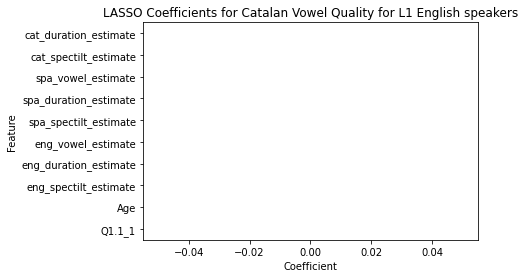

In [230]:
sns.barplot(x="Coefficient", y="Feature",
            data=lasso_cat_vowel_data.nlargest(10, 'abs_coef')).set_title("LASSO Coefficients for Catalan Vowel Quality for L1 English speakers")
plt.show();

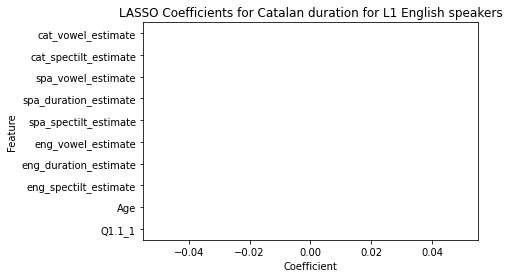

In [231]:
# Catalan duration
lasso_reg = Lasso(max_iter=10000)  

lasso_cat_dur = lasso_reg.fit(X_cat_dur, Y_cat_dur)
lasso_cat_dur_data = pd.DataFrame([lasso_cat_dur.coef_, X_cat_dur.columns]).T
lasso_cat_dur_data.columns = ['Coefficient', 'Feature']
lasso_cat_dur_data['abs_coef'] = abs(lasso_cat_dur_data['Coefficient'])
lasso_cat_dur_data['abs_coef'] = pd.to_numeric(lasso_cat_dur_data['abs_coef'])

sns.barplot(x="Coefficient", y="Feature",
            data=lasso_cat_dur_data.nlargest(10, 'abs_coef')).set_title("LASSO Coefficients for Catalan duration for L1 English speakers")
plt.show();

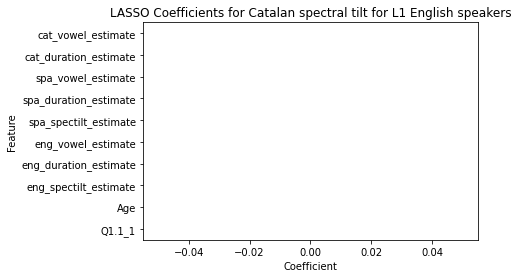

In [232]:
# Catalan spectral tilt
lasso_reg = Lasso(max_iter=10000)  

lasso_cat_st = lasso_reg.fit(X_cat_st, Y_cat_st)
lasso_cat_st_data = pd.DataFrame([lasso_cat_st.coef_, X_cat_st.columns]).T
lasso_cat_st_data.columns = ['Coefficient', 'Feature']
lasso_cat_st_data['abs_coef'] = abs(lasso_cat_st_data['Coefficient'])
lasso_cat_st_data['abs_coef'] = pd.to_numeric(lasso_cat_st_data['abs_coef'])

sns.barplot(x="Coefficient", y="Feature",
            data=lasso_cat_st_data.nlargest(10, 'abs_coef')).set_title("LASSO Coefficients for Catalan spectral tilt for L1 English speakers")
plt.show();

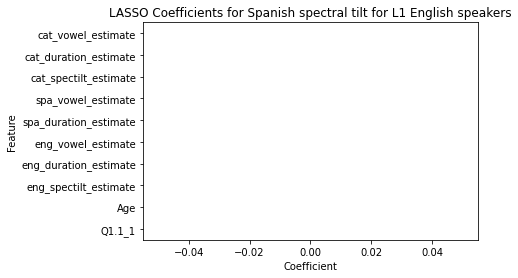

In [233]:
# Spanish spectral tilt
lasso_reg = Lasso(max_iter=10000)  

lasso_spa_st = lasso_reg.fit(X_spa_st, Y_spa_st)
lasso_spa_st_data = pd.DataFrame([lasso_spa_st.coef_, X_spa_st.columns]).T
lasso_spa_st_data.columns = ['Coefficient', 'Feature']
lasso_spa_st_data['abs_coef'] = abs(lasso_spa_st_data['Coefficient'])
lasso_spa_st_data['abs_coef'] = pd.to_numeric(lasso_spa_st_data['abs_coef'])

sns.barplot(x="Coefficient", y="Feature",
            data=lasso_spa_st_data.nlargest(10, 'abs_coef')).set_title("LASSO Coefficients for Spanish spectral tilt for L1 English speakers")
plt.show();

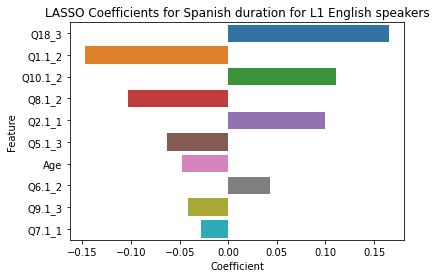

In [210]:
# Spanish duration
lasso_reg = Lasso(max_iter=10000)  

lasso_spa_dur = lasso_reg.fit(X_spa_dur, Y_spa_dur)
lasso_spa_dur_data = pd.DataFrame([lasso_spa_dur.coef_, X_spa_dur.columns]).T
lasso_spa_dur_data.columns = ['Coefficient', 'Feature']
lasso_spa_dur_data['abs_coef'] = abs(lasso_spa_dur_data['Coefficient'])
lasso_spa_dur_data['abs_coef'] = pd.to_numeric(lasso_spa_dur_data['abs_coef'])

sns.barplot(x="Coefficient", y="Feature",
            data=lasso_spa_dur_data.nlargest(10, 'abs_coef')).set_title("LASSO Coefficients for Spanish duration for L1 English speakers")
plt.show();

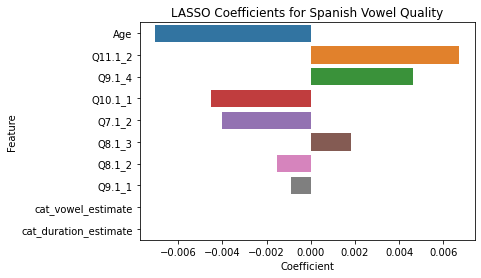

In [211]:
# Spanish vowel quality
lasso_reg = Lasso(max_iter=10000)  

lasso_spa_vowel = lasso_reg.fit(X_spa_vowel, Y_spa_vowel)
lasso_spa_vowel_data = pd.DataFrame([lasso_spa_vowel.coef_, X_spa_vowel.columns]).T
lasso_spa_vowel_data.columns = ['Coefficient', 'Feature']
lasso_spa_vowel_data['abs_coef'] = abs(lasso_spa_vowel_data['Coefficient'])
lasso_spa_vowel_data['abs_coef'] = pd.to_numeric(lasso_spa_vowel_data['abs_coef'])

sns.barplot(x="Coefficient", y="Feature",
            data=lasso_spa_vowel_data.nlargest(10, 'abs_coef')).set_title("LASSO Coefficients for Spanish Vowel Quality")
plt.show();